# Adam Trentowski - 162602 - Machine Learning
## lab_11
## Library Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import warnings
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output

from sklearn.model_selection import train_test_split

## Data loading

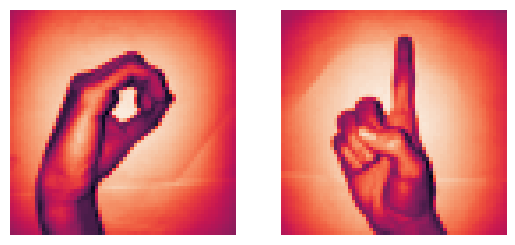

In [2]:
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')

img_size = 64

plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

plt.show()

## Join arrays row-wise; 0–204: zero, 205–410: one.

In [3]:
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0)

z = np.zeros(205)
o = np.ones(205)

Y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


## Splitting dataset to train and test sets

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)
x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


## Initializing parameters

In [6]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

w, b = initialize_weights_and_bias(4096)

## Calculation of z
z = np.dot(w.T, x_train) + b

In [7]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

y_head = sigmoid(0)
y_head

np.float64(0.5)

## Forward propagation steps:
find z = w.T * x + b

y_head = sigmoid(z)

loss(error) = loss(y, y_head)

cost = sum(loss)

In [9]:
def forward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)

    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]

    return cost

## Combine forward & backward propagation using y_head.

In [10]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = np.sum(loss) / x_train.shape[1]

    # backward propagation
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]

    gradients = {
        "derivative_weight": derivative_weight,
        "derivative_bias": derivative_bias
    }

    return cost, gradients

## Updating (learning) parameters

In [11]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))

    parameters = {"weight": w, "bias": b}

    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients, cost_list

Cost after iteration 0: 14.014222
Cost after iteration 10: 1.918535
Cost after iteration 20: 1.750365
Cost after iteration 30: 1.653524
Cost after iteration 40: 1.560956
Cost after iteration 50: 1.457745
Cost after iteration 60: 1.335495
Cost after iteration 70: 1.191800
Cost after iteration 80: 1.027511
Cost after iteration 90: 0.843100
Cost after iteration 100: 0.639890
Cost after iteration 110: 0.432595
Cost after iteration 120: 0.278192
Cost after iteration 130: 0.221609
Cost after iteration 140: 0.208972
Cost after iteration 150: 0.203415
Cost after iteration 160: 0.198754
Cost after iteration 170: 0.194446
Cost after iteration 180: 0.190433
Cost after iteration 190: 0.186683


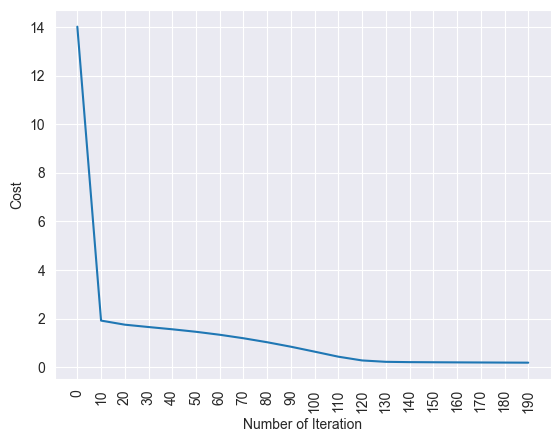

In [12]:
parameters, gradients, cost_list = update(
    w, b, x_train, y_train,
    learning_rate=0.009,
    number_of_iteration=200
)

## Prediction

In [13]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    # if z is bigger than 0.5, our prediction is sign one (y_head=1)
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0)
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

predict(parameters["weight"], parameters["bias"], x_test)

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


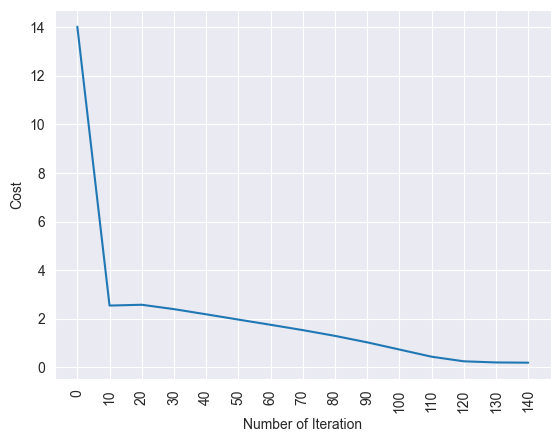

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [14]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]  # that is 4096
    w, b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=150)

## Logistic regression using Sklearn

In [15]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(random_state=42, max_iter=150)

print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 
